In [452]:
#computer Vision 
#Chapter 1
#Basic Image Handling and Processing

In [453]:
#import and image handling
from PIL import Image
pil_im = Image.open('thumb_DSC_0363_1024.jpg').convert("L")

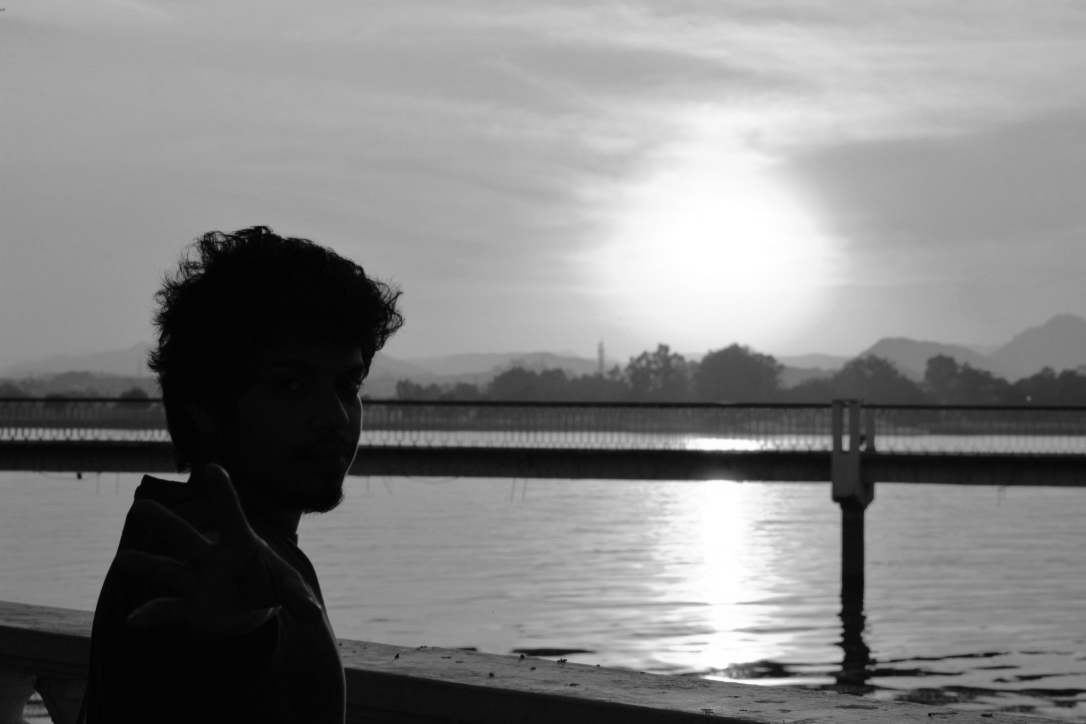

In [454]:
pil_im

In [455]:
#creating thumbnail
#pil_im.thumbnail((256,256))

In [456]:
#croping regoin
#box = (100,100,400,400)
#region = pil_im.crop(box)

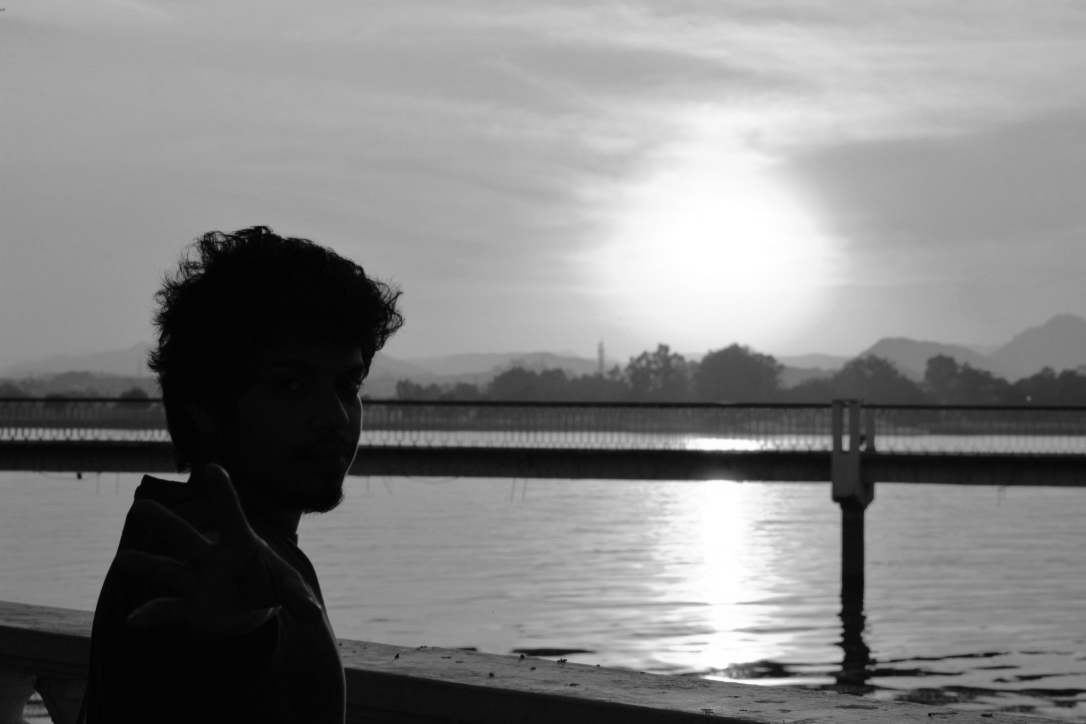

In [457]:
pil_im

In [458]:
#resize 
out = pil_im.resize((10,10))
out = pil_im.rotate(60)

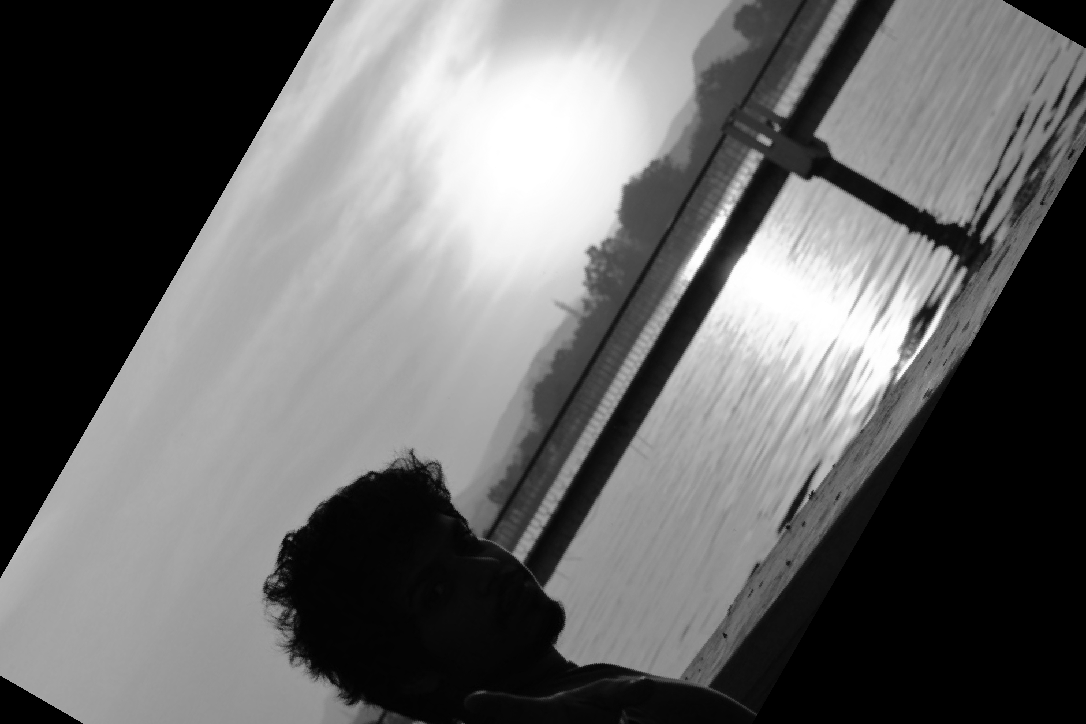

In [459]:
out

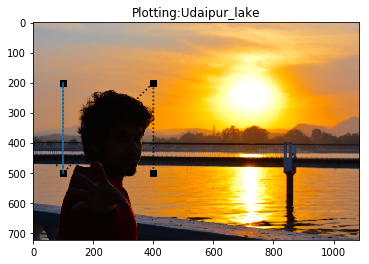

In [577]:
#Matplotlib 
from PIL import Image 
from pylab import *
# read image to array
im = array(Image.open('thumb_DSC_0363_1024.jpg')) # plot the image
imshow(im)
# some points
x = [100,100,400,400]
y = [200,500,200,500]

# plot the points with red star-markers
plot(x,y,'go') # green line with circle-markers
plot(x,y,'ks:') # black dotted line with square-markers

# line plot connecting the first two points
plot(x[:2],y[:2])

# add title and show the plot
title('Plotting'':' 'Udaipur_lake')
show()

In [461]:
#Contour
from PIL import Image
from pylab import *
# read image to array
im = array(Image.open('thumb_DSC_0363_1024.jpg').convert('L'))
imshow(im)
# create a new figure
figure()
# don’t use colors
gray()
# show contours with origin upper left corner
contour(im, origin='image')
axis('equal')
axis('off')


(0.5, 1085.5, 0.5, 723.5)

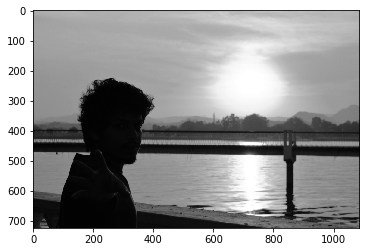

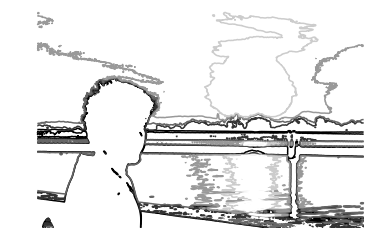

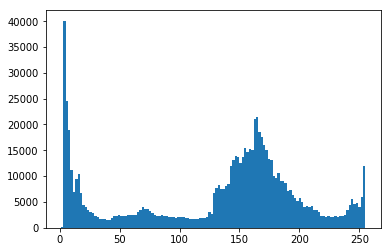

In [462]:
#making a histogram in pyhton
figure()
hist(im.flatten(),128)
show()

In [474]:
from PIL import Image
from numpy import *
im = array(Image.open('thumb_DSC_0363_1024.jpg'))
im2_1 = 255 - im #invert image
im3 = (100.0/255) * im + 100 #clamp to interval 100...200
im4 = 255.0 * (im/255.0)**2 #squared


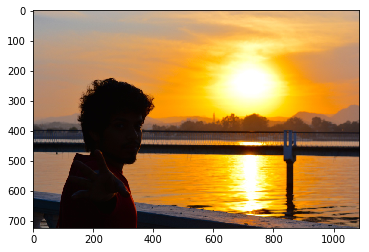

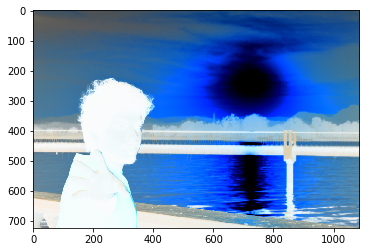

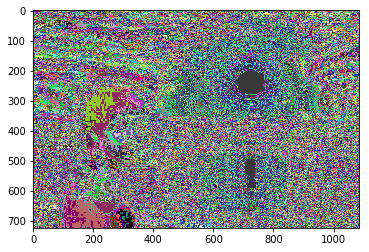

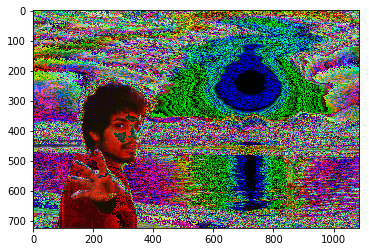

In [475]:

import matplotlib.pyplot as plt
plt.imshow(im)
plt.show()

plt.imshow(im2_1)
plt.show()

plt.imshow(im3)
plt.show()

plt.imshow(im4)
plt.show()



In [466]:
#image resize using Numpy : our best tool
def imresize(im,sz):
    """ Resize an image array using PIL. """
    pil_im = Image.fromarray(uint8(im))
    return array(pil_im.resize(sz))

In [509]:
#Histogram equalization
def histeq(im,nbr_bins=256):
    """ Histogram equalization of a grayscale image. """
      # get image histogram
    imhist,bins = histogram(im.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize
    # use linear interpolation of cdf to find new pixel values
    im2 = interp(im.flatten(),bins[:-1],cdf)
    return im2.reshape(im.shape), cdf

In [513]:
from PIL import Image
from numpy import *
im = array(Image.open('thumb_DSC_0363_1024.jpg').convert("L"))
im2,cdf = histeq(im)


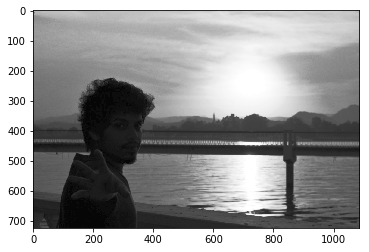

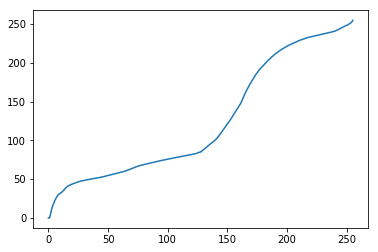

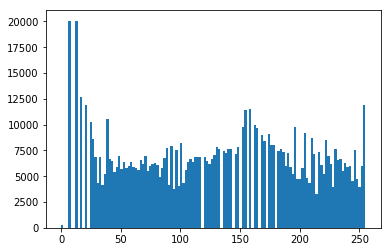

In [514]:
plt.imshow(im2)
plt.show()
plot(cdf)
plt.show()

#making a histogram in pyhton
figure()
hist(im2.flatten(),128)
show()


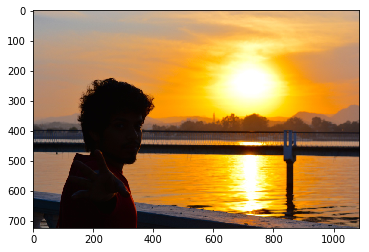

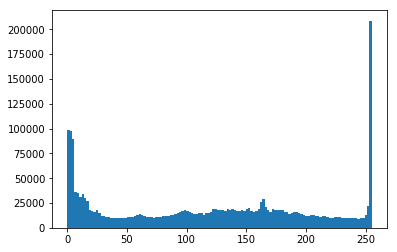

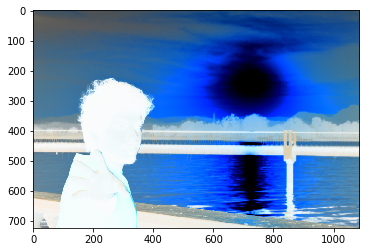

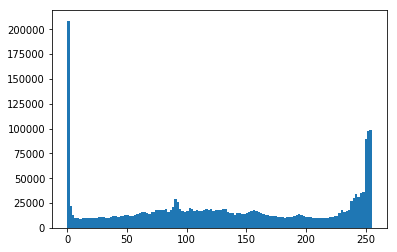

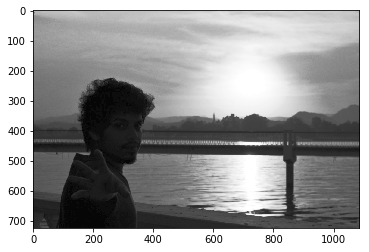

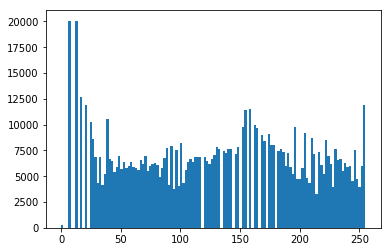

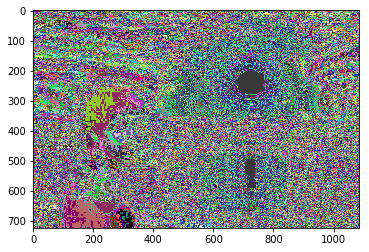

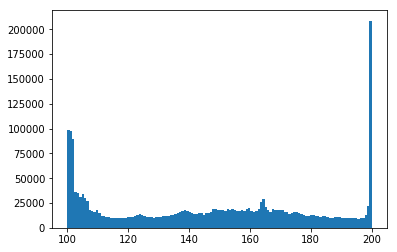

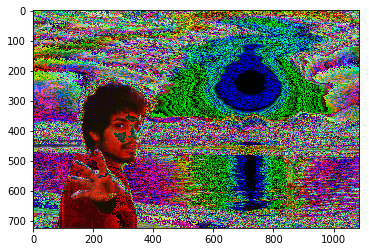

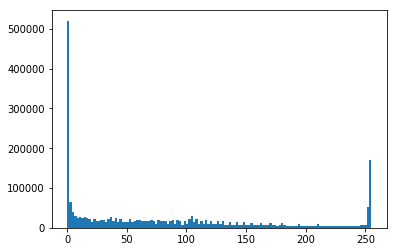

In [479]:
import matplotlib.pyplot as plt
plt.imshow(im)
plt.show()
hist(im.flatten(),128)
show()
#img2_1
plt.imshow(im2_1)
plt.show()
hist(im2_1.flatten(),128)
show()
#img2
plt.imshow(im2)
plt.show()
hist(im2.flatten(),128)
show()
#img3
plt.imshow(im3)
plt.show()
hist(im3.flatten(),128)
show()
# im4
plt.imshow(im4)
plt.show()
hist(im4.flatten(),128)
show()



In [258]:
#compute average
def compute_average(imlist):
    """ Compute the average of a list of images. """
    # open first image and make into array of type float
    averageim = array(Image.open(imlist[0]), 'f')
    for imname in imlist[1:]:
        try:
            averageim += array(Image.open(imname))
        except:
            print imname + '...skipped'
    averageim /= len(imlist)
            # return average as uint8
    return array(averageim, 'uint8')

In [308]:
#Doing PCA
from PIL import Image
from numpy import *
def pca(X):
    """ Principal Component Analysis
    input: X, matrix with training data stored as flattened arrays in rows
    return: projection matrix (with important dimensions first), variance and mean. """
    # get dimensions
    num_data,dim = X.shape
    # center data
    mean_X = X.mean(axis=0)
    X = X - mean_X
    if dim>num_data:
        # PCA - compact trick used
        M = dot(X,X.T) # covariance matrix
        e,EV = linalg.eigh(M) # eigenvalues and eigenvectors
        tmp = dot(X.T,EV).T # this is the compact trick
        V = tmp[::-1] # reverse since last eigenvectors are the ones we want
        S = sqrt(e)[::-1] # reverse since eigenvalues are in increasing order
        for i in range(V.shape[1]):
            V[:,i] /= S
        else:
        # PCA - SVD used
            U,S,V = linalg.svd(X)
            V = V[:num_data] # only makes sense to return the first num_data
            # return the projection matrix, the variance and the mean
            return V,S,mean_X

In [309]:
X = array(Image.open('thumb_DSC_0363_1024.jpg').convert("L"))
V,S,mean_x = pca(im)
""" Principal Component Analysis
input: X, matrix with training data stored as flattened arrays in rows
get dimensions"""
num_data,dim = X.shape

/Users/avaneeshkumar/.virtualenvs/cv/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt


In [310]:
print(num_data)
mean_X = X.mean(axis=0)
print (len(mean_x))
print(dim)
X = X - mean_X
X[0]

724
1086
1086


array([ 59.25966851,  58.46685083,  57.70718232, ...,  43.88121547,
        43.80248619,  43.81767956])

In [311]:
M = dot(X,X.T)

In [313]:
M.shape
e,EV = linalg.eigh(M)

In [318]:
len(EV)

724

In [ ]:
#Assuming that the filenames of images are stored in a list
imlist = []
from PIL import Image
from numpy import *
from pylab import *
im = array(Image.open(imlist[0])) # open one image to get size
m,n = im.shape[0:2] # get the size of the images
imnbr = len(imlist) # get the number of images
# create matrix to store all flattened images
immatrix = array([array(Image.open(im)).flatten()
                  for im in imlist],'f')

# perform PCA
V,S,immean = pca.pca(immatrix)
# show some images (mean and 7 first modes)
figure()
gray()
subplot(2,4,1)
imshow(immean.reshape(m,n))
for i in range(7):
    subplot(2,4,i+2)
    imshow(V[i].reshape(m,n))
show()

In [ ]:
# http: //docs.python.org/library/pickle.html#module-pickle.
#Using the Pickle module
# save mean and principal components
f = open('font_pca_modes.pkl', 'wb')
pickle.dump(immean,f)
pickle.dump(V,f)
f.close()

In [ ]:
#using from pickle in someother session
# load mean and principal components
f = open('font_pca_modes.pkl', 'rb')
immean = pickle.load(f)
V = pickle.load(f)
f.close()

In [ ]:
#using it with "with statement"
# open file and save
with open('font_pca_modes.pkl','wb') as f:
  pickle.dump(immean,f)
  pickle.dump(V,f)
# open file and load
with open('font_pca_modes.pkl', 'rb') as f:
  immean = pickle.load(f)
  V = pickle.load(f)

In [481]:
#Gaussian Filtering
from PIL import Image
from numpy import *
from scipy.ndimage import filters
im = Image.open('thumb_DSC_0363_1024.jpg')

im2 = filters.gaussian_filter(im,2)
#Here the last parameter of gaussian_filter() is the standard deviation
#increase last para and the image gets blurred and lesser and more imp. features are present.

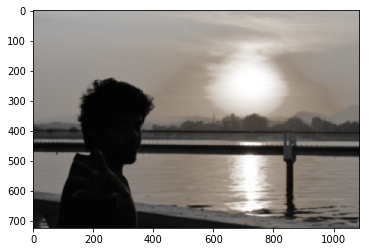

In [482]:
plt.imshow(im2)
plt.show()

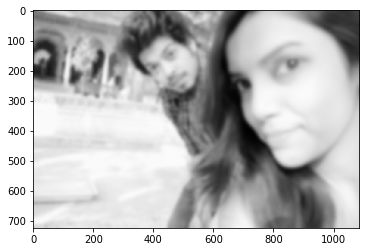

In [483]:
im = array(Image.open())
im3 = zeros(im.shape)
for i in range(3):
    im3[:,:,i] = filters.gaussian_filter(im[:,:,i],5)
im3 = uint8(im3)

plt.imshow(im3)
plt.show()

In [ ]:
'''Image derivatives
How the image intensity changes over the image is important information, 
used for many applications as we will see throughout this book. The intensity 
change is de- scribed with the x and y derivatives Ix and Iy of the graylevel 
image I (for color images, derivatives are usually taken for each color channel)'''

In [485]:
#implemneting on color image _ sobel operator for feature detection : Edge detection 
from PIL import Image
from numpy import *
from scipy.ndimage import filters
im = array(Image.open('thumb_DSC_0363_1024.jpg').convert("L"))

#Sobel derivative filters
imx = zeros(im.shape)
filters.sobel(im,1,imx)
imy = zeros(im.shape)
filters.sobel(im,0,imy)
magnitude = sqrt(imx**2+imy**2)

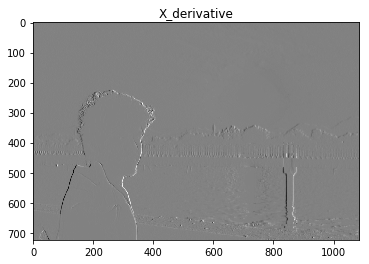

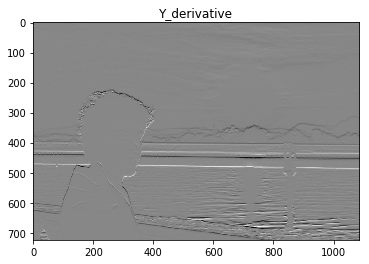

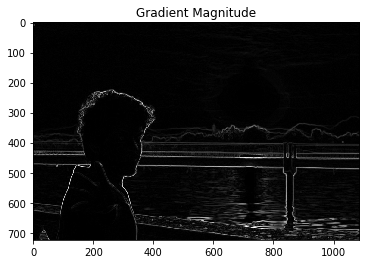

In [486]:
plt.imshow(imx)
plt.title('X_derivative')
plt.show()

plt.imshow(imy)
plt.title('Y_derivative')
plt.show()

plt.imshow(magnitude)
plt.title('Gradient Magnitude')
plt.show()

In [426]:
im1 = array(Image.open('thumb_DSC_0363_1024.jpg').convert("L"))
imx1 = zeros(im1.shape)
filters.sobel(im1,1,imx1)
imy1 = zeros(im1.shape)
filters.sobel(im1,0,imy1)
magnitude1 = sqrt(imx1**2+imy1**2)

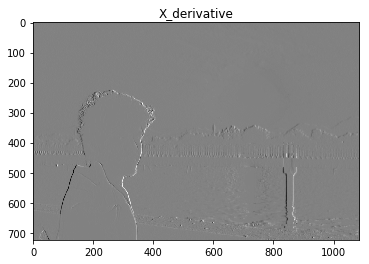

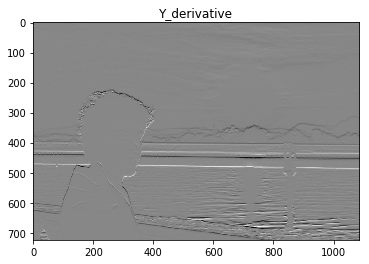

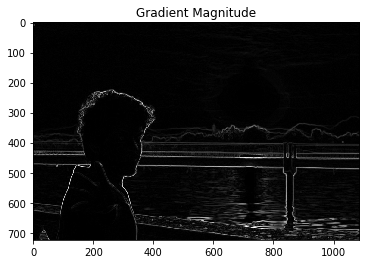

In [427]:
plt.imshow(imx)
plt.title('X_derivative')
plt.show()

plt.imshow(imy)
plt.title('Y_derivative')
plt.show()

plt.imshow(magnitude)
plt.title('Gradient Magnitude')
plt.show()

In [ ]:
#mathematical Morphology : counting different objects

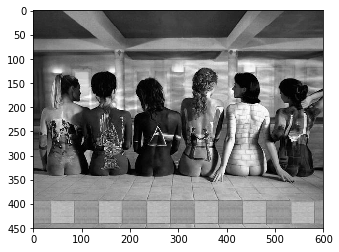

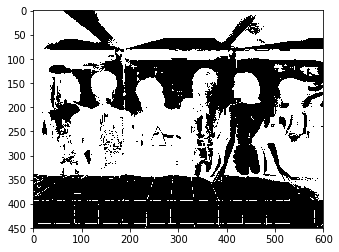

Number of objects: 521


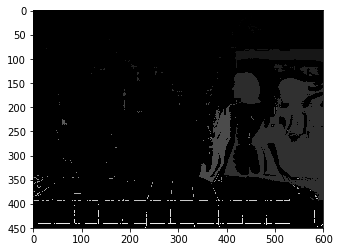

In [487]:
#this takes care that the image is binary using a thershold
from scipy.ndimage import measurements,morphology
# load image and threshold to make sure it is binary
im = array(Image.open('PF.jpg').convert('L'))
plt.imshow(im)
plt.show()
im = 1*(im<128)
plt.imshow(im)
plt.show()
labels, nbr_objects = measurements.label(im)
print "Number of objects:", nbr_objects
labels

plt.imshow(labels)
plt.show()

In [488]:
# morphology - opening to separate objects better
im_open = morphology.binary_opening(im,ones((9,5)),iterations=2)
labels_open, nbr_objects_open = measurements.label(im_open)
print "Number of objects:",nbr_objects_open

Number of objects: 21


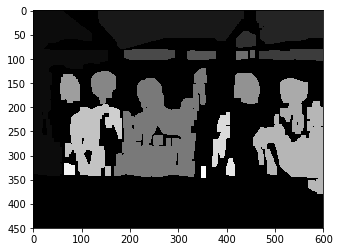

In [490]:
plt.imshow(labels_open)
plt.show()

In [ ]:
#Image de-noising is the process of removing image noise while at the same time 
#trying to preserve details and structures

'''We will use the Rudin-Osher-Fatemi de-noising model (ROF) originally introduced
in [28]. Removing noise from images is important for many applications, from making
your holiday photos look better to improving the qual- ity of satellite images. The
ROF model has the interesting property that it finds a smoother version of the image
while preserving edges and structures.'''

In [497]:
from numpy import *
def denoise(im,U_init,tolerance=0.1,tau=0.125,tv_weight=100):
    """ An implementation of the Rudin-Osher-Fatemi (ROF) denoising model
    using the numerical procedure presented in eq (11) A. Chambolle (2005).
    Input: noisy input image (grayscale), initial guess for U, weight of the TV-regularizing term,
    steplength, tolerance for stop criterion.
    Output: denoised and detextured image, texture residual. """ 
    m,n = im.shape #size of noisy image
    # initialize
    U = U_init
    Px = im #x-component to the dual field
    Py = im #y-component of the dual field
    error = 1
    while (error > tolerance):
        Uold = U
        
        # gradient of primal variable
        GradUx = roll(U,-1,axis=1)-U # x-component of U’s
        GradUy = roll(U,-1,axis=0)-U # y-component of U’s
        
        # update the dual varible
        PxNew = Px + (tau/tv_weight)*GradUx
        PyNew = Py + (tau/tv_weight)*GradUy
        NormNew = maximum(1,sqrt(PxNew**2+PyNew**2))
        
        Px = PxNew/NormNew # update of x-component (dual)
        Py = PyNew/NormNew # update of y-component (dual)
        
        # update the primal variable
        RxPx = roll(Px,1,axis=1) # right x-translation of x-component
        RyPy = roll(Py,1,axis=0) # right y-translation of y-component
        DivP = (Px-RxPx)+(Py-RyPy) # divergence of the dual field.
        U = im + tv_weight*DivP # update of the primal variable
        
        # update of error
        error = linalg.norm(U-Uold)/sqrt(n*m);
        
    return U,im-U # denoised image and texture residual

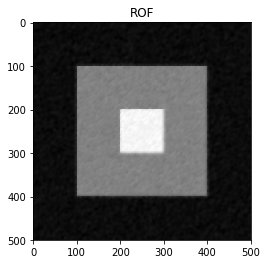

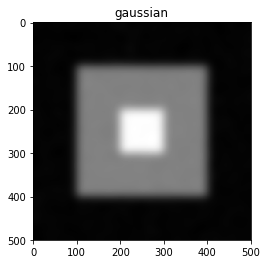

In [508]:
#synthetic image formation and using scipy for the value computation 
from numpy import *
from numpy import random
from scipy.ndimage import filters

# create synthetic image with noise
im = zeros((500,500))
im[100:400,100:400] = 128
im[200:300,200:300] = 255
im = im + 30*random.standard_normal((500,500))
U,T = denoise(im,im)
G = filters.gaussian_filter(im,10)

# save the result, using scipy for practice
import scipy.misc
scipy.misc.imsave('synth_rof.png',U) 
scipy.misc.imsave('synth_gaussian.png',G)

synth_rof = array(Image.open('synth_rof.png').convert('L'))
plt.imshow(synth_rof)
plt.title('ROF')
plt.grid(False)
plt.show()
synth_gaussain = array(Image.open('synth_gaussian.png').convert('L'))
plt.imshow(synth_gaussain)
plt.title('gaussian')
plt.grid(False)
plt.show()

#Edges are smooth in ROf version

In [ ]:
# Excercises 
#Take an image and apply Gaussian blur like in Figure 1.9. Plot the image contours for 
#increasing values of sigma. What happens? Can you explain why?

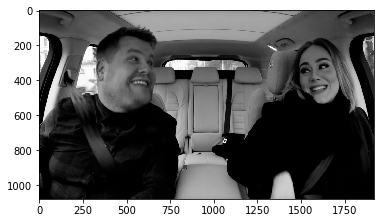

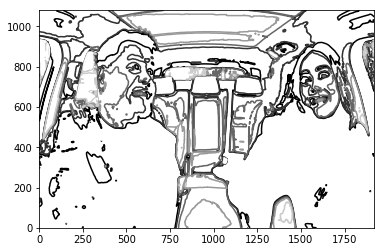

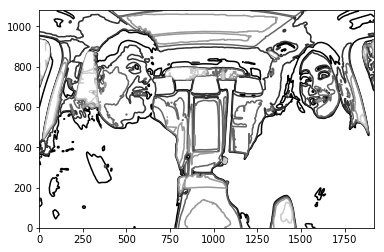

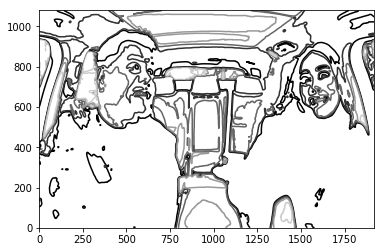

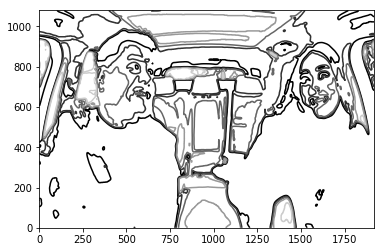

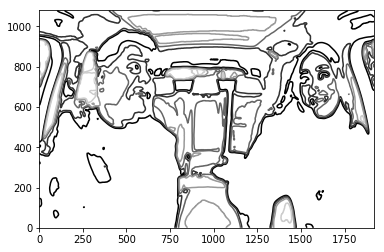

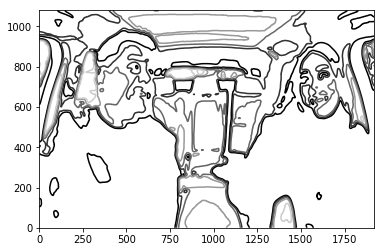

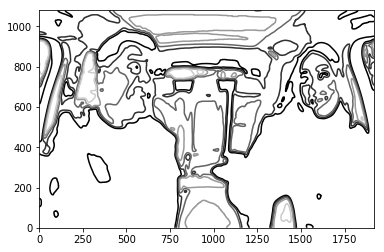

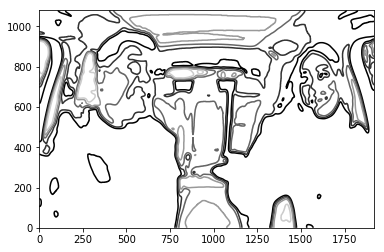

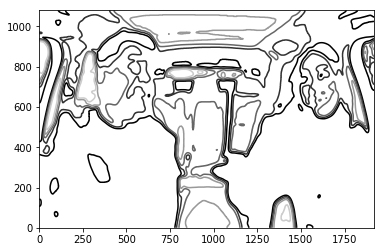

In [532]:
#TContouor plt loses its information with increase with blue and only edges are found. 
img = array(Image.open('adele.jpg').convert('L'))
plt.imshow(img)
plt.show()
for i in range(1,10):
    G = filters.gaussian_filter(img,i)
    contour(G, origin='image')
    plt.show()

In [533]:
#2. Implement an unsharp masking operation (http://en.wikipedia.org/wiki/Unsharp_ masking)
#by blurring an image and then subtracting the blurred version from the
#original. This gives a sharpening effect to the image. Try this on both color and grayscale images.

In [578]:
img = array(Image.open('neha.jpg').convert("L"))
img.shape

(925, 1024)

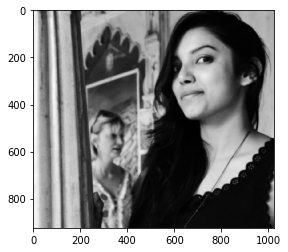

In [572]:
G = filters.gaussian_filter(img,2)
plt.imshow(G)
plt.show()


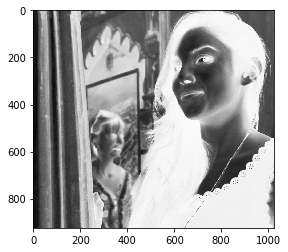

In [573]:
G_dash = 255 - img #invert image
plt.imshow(G_dash)
plt.show()

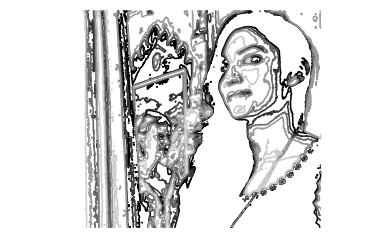

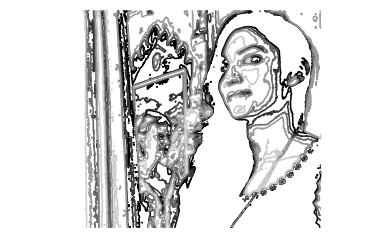

In [575]:
figure()
# don’t use colors
gray()
# show contours with origin upper left corner
contour(img, origin='image')
axis('equal')
axis('off')
plt.show()

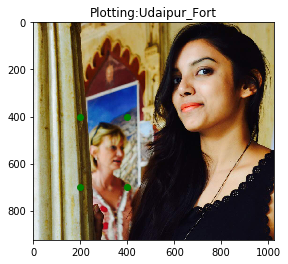

In [602]:
import cv2
G = filters.gaussian_filter(img,2)
# plot the points with red star-markers
#plot(x,y,'go') # green line with circle-markers
img = array(Image.open('neha.jpg'))
imshow(img)
# some points
x = [200,200,400,400]
y = [400,700,400,700]
#x = [100,100,200,200]
#y = [400,400,750,750]

# plot the points with red star-markers
plot(x,y,'go') # green line with circle-markers
# line plot connecting the first two points
#plot(x[:2],y[:2])
# add title and show the plot
title('Plotting'':' 'Udaipur_Fort')
show()


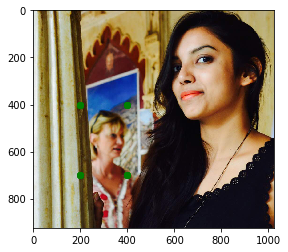

In [617]:
img = Image.open('neha.jpg')
x = [200,200,400,400]
y = [400,700,400,700]
plot(x,y,'go')
region = img.crop()
G = filters.gaussian_filter(2)
plt.imshow(region)
show()